In [1]:
# Imports for plotting.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

# General imports.
from data import *
from operator import attrgetter

In [2]:
# Plotting defaults.
figure_size = (14, 10)
bar_width = 0.30
hatches = ['//', '--', '**']
alphas = np.arange(0.2, 1.2, 0.2)
axes_fontsize=32

matplotlib.rcParams.update({"font.size": 16,"figure.autolayout": True})
matplotlib.rcParams['xtick.labelsize'] = 26
matplotlib.rcParams['ytick.labelsize'] = 26
plt.rcParams["font.family"] = "Times New Roman"

## Execution Statistics

The following cells are used to find the points of interest in the CSV.

In [3]:
# Load the events from the CSV file into the Plotter class.
CSV_FILE = "./test.csv"
plotter = Plotter(csv_paths=[CSV_FILE])
events = plotter._events[CSV_FILE]

In [6]:
print("The end time of the simulator was: {}".format(plotter.get_simulator_end_time(CSV_FILE)))
print("The number of tasks were: {}".format(len(plotter.get_tasks(CSV_FILE))))

# Missed deadline statistics
missed_deadline_events = plotter.get_missed_deadline_events(CSV_FILE)
print("The number of missed deadlines were: {}".format(len(missed_deadline_events)))

# Worker Pool statistics
worker_pool_stats = plotter.get_worker_pool_utilizations(CSV_FILE)
resource_types = ["GPU", "CPU"]
resource_allocations = {
    resource: [
        (stat.resource_utilizations[resource][0] / sum(stat.resource_utilizations[resource]), stat.simulator_time)
            for stat in worker_pool_stats
    ] for resource in resource_types
}

for resource in resource_types:
    
    print(f"The peak utilization for {resource} was {max()} at {}")
print(resource_allocations)

The end time of the simulator was: 2789034.0
The number of tasks were: 20
The number of missed deadlines were: 2
{'GPU': [(0.0, 0.0), (0.0, 5000.0), (0.0, 11485.0), (0.0, 21990.0), (0.0, 30638.0), (0.0, 47989.0), (0.0, 51148.0), (0.0, 53956.0), (0.0, 55686.0), (0.0, 57657.0), (0.0, 62834.0), (0.0, 83385.0), (0.0, 105694.0), (0.0, 223864.0), (0.0, 230555.0), (0.0, 263045.0), (0.0, 271501.0), (0.09090909090909091, 288354.0), (0.18181818181818182, 296352.0), (0.18181818181818182, 401759.0), (0.09090909090909091, 405071.0), (0.09090909090909091, 412768.0), (0.09090909090909091, 417313.0), (0.0, 418883.0), (0.09090909090909091, 423159.0), (0.0, 424133.0), (0.0, 2545275.0), (0.0, 2718294.0), (0.0, 2721836.0), (0.0, 2789033.0)], 'CPU': [(0.0, 0.0), (0.058823529411764705, 5000.0), (0.0, 11485.0), (0.058823529411764705, 21990.0), (0.0, 30638.0), (0.058823529411764705, 47989.0), (0.058823529411764705, 51148.0), (0.058823529411764705, 53956.0), (0.058823529411764705, 55686.0), (0.0588235294117647

# WorkerPool Utilization

In this experiment, our goal is to visualize the utilization of the entire set of resources at each run of the scheduler.

In [12]:
worker_pool_stats = plotter.get_worker_pool_utilizations(CSV_FILE)

# Find all the resource types in the system.
resource_types = set()
for stats in worker_pool_stats:
    for resource in stats.resource_utilizations.keys():
        resource_types.add(resource)
        
# Calculate the heights of utilization for each resource, after normalization.
resource_used_heights = {
    resource: [
        stat.resource_utilizations[resource][0] / sum(stat.resource_utilizations[resource]) 
            for stat in worker_pool_stats
    ] for resource in resource_types
}
resource_free_heights = {
    resource: [
        stat.resource_utilizations[resource][1] / sum(stat.resource_utilizations[resource])
            for stat in worker_pool_stats
    ] for resource in resource_types
}   
print(max(resource_used_heights['CPU']))

0.23529411764705882


([<matplotlib.axis.YTick at 0x11d21ae20>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

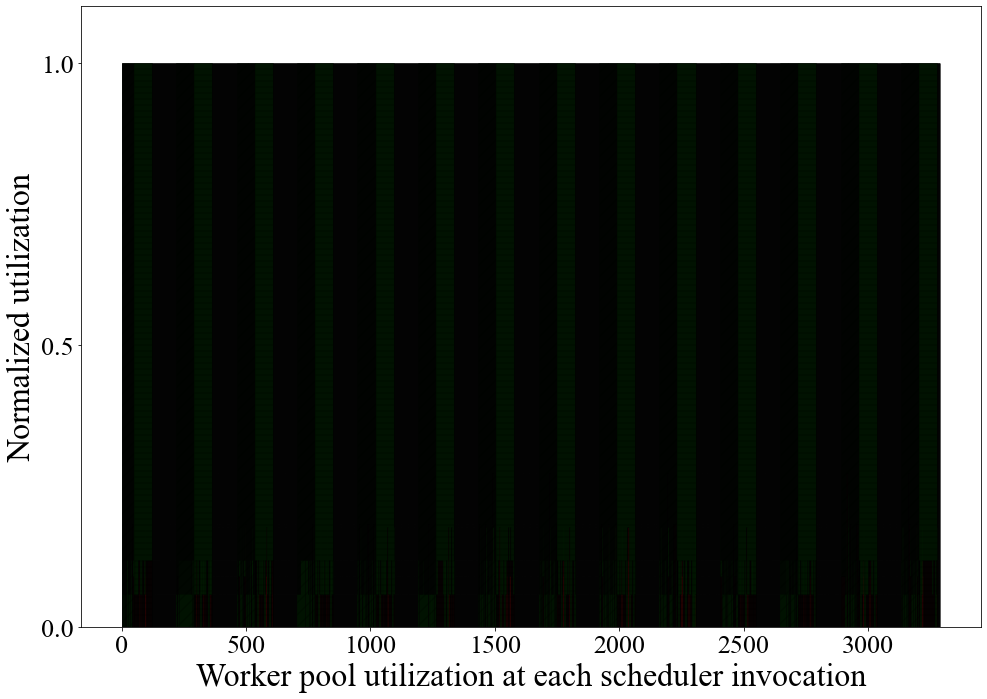

In [5]:
# Plot a histogram with the results.
fig = plt.figure(figsize=figure_size)
x_vals = np.arange(1, len(worker_pool_stats) + 1)
resource_used_bars = [
    plt.bar(
        x_vals + bar_width * i,
        resource_used_heights[resource_type],
        width=bar_width,
        edgecolor='black',
        hatch=hatches[i],
        alpha=0.4,
        color='red',
    ) for i, resource_type in enumerate(resource_types)
]
resource_free_bars = [
    plt.bar(
        x_vals + bar_width * i,
        resource_free_heights[resource_type],
        bottom=resource_used_heights[resource_type],
        width=bar_width,
        edgecolor='black',
        hatch=hatches[i],
        alpha=0.4,
        color='green',
    ) for i, resource_type in enumerate(resource_types)
]

# Add the axis labels.
plt.xlabel('Worker pool utilization at each scheduler invocation', fontsize=axes_fontsize)
plt.ylabel('Normalized utilization', fontsize=axes_fontsize)

# Set the y limits so we can visualize the legend.
ax = fig.gca()
ax.set_ylim(0, 1.1)
plt.yticks([0, 0.5, 1.0])

# Set the legend.
# legend_elements = [
#     Patch(facecolor='white', hatch=hatches[i], label=resource_type)
#         for i, resource_type in enumerate(resource_types)
# ]
# plt.legend(handles=legend_elements, prop={'size': 28}, framealpha=0, ncol=len(resource_types))

# Scheduler Performance

In these experiments, we visualize how good the scheduler performs when it comes to scheduling the set of released tasks.

In [ ]:
# Retrieve the runtime of the scheduler invocations.
scheduler_invocations = plotter.get_scheduler_invocations(CSV_FILE)
runtimes = list(map(attrgetter('runtime'), scheduler_invocations))
start_times = list(map(attrgetter('start_time'), scheduler_invocations))

In [ ]:
# Plot a timelapse of the runtime of the scheduler.
fig = plt.figure(figsize=figure_size)
plt.plot(runtimes, marker='o')
plt.xlabel("Scheduler Invocation", fontsize=axes_fontsize)
plt.ylabel("Runtime [ms]", fontsize=axes_fontsize)

In [ ]:
# Plot the CDF of the runtime of the scheduler invocations.
count, bin_count = np.histogram(runtimes, bins=100)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

fig = plt.figure(figsize=figure_size)
plt.plot(bin_count[1:], cdf, label="CDF")
plt.xlabel("Runtime [ms]", fontsize=axes_fontsize)
plt.ylabel("CDF", fontsize=axes_fontsize)
plt.legend(prop={'size': 28})

In [ ]:
# Calculate the heights of placed and unplaced tasks.
placed_task_heights = [
    scheduler_invocation.placed_tasks for scheduler_invocation in scheduler_invocations
]
unplaced_task_heights = [
    scheduler_invocation.unplaced_tasks for scheduler_invocation in scheduler_invocations
]
print(placed_task_heights)
print(unplaced_task_heights)

In [ ]:
# Plot a histogram with the results.
fig = plt.figure(figsize=figure_size)
x_vals = np.arange(1, len(scheduler_invocations) + 1)

placed_task_bar = plt.bar(
    x_vals,
    placed_task_heights,
    edgecolor='black',
    hatch='//',
    alpha=0.4,
    color='green',
)

unplaced_task_bar = plt.bar(
    x_vals,
    unplaced_task_heights,
    bottom=placed_task_heights,
    edgecolor='black',
    hatch='**',
    alpha=0.4,
    color='red',
)

# Add the axis labels.
plt.xlabel('Scheduler Invocations', fontsize=axes_fontsize)
plt.ylabel('Placed and Unplaced Tasks', fontsize=axes_fontsize)

# Add the yticks 
max_y_val = max(scheduler_invocation.total_tasks for scheduler_invocation in scheduler_invocations)
y_ticks = list(range(int(max_y_val)))
plt.yticks(y_ticks)

# Set the legend.
legend_elements = [
    Patch(facecolor='green', hatch='//', label='Placed Tasks'),
    Patch(facecolor='red', hatch='**', label='Unplaced Tasks')
]
plt.legend(handles=legend_elements, prop={'size': 28}, framealpha=0)

# Task Statistics

These experiments aim to visualize the statistics about a task's runtime, missed deadline etc.

(array([6.28878784e-09, 2.51551514e-08, 2.51551514e-08, 0.00000000e+00,
        4.40215149e-08, 1.38353333e-07, 6.28878784e-07, 1.17348781e-05,
        8.17542419e-08, 1.88663635e-08]),
 array([-606068.07 , -527348.686, -448629.302, -369909.918, -291190.534,
        -212471.15 , -133751.766,  -55032.382,   23687.002,  102406.386,
         181125.77 ]),
 <BarContainer object of 10 artists>)

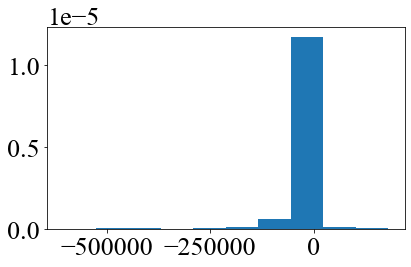

In [9]:
# Plot a histogram of the slack from the deadline for the tasks.
tasks = plotter.get_tasks(CSV_FILE)

slack = [task.deadline - task.completion_time for task in tasks]
plt.hist(slack, density=True, bins=10)

In [7]:
for task in tasks:
    print("Task Name: {}\n\tStart Time: {}\n\tCompletion Time: {}\n\tDeadline: {}\n\tRuntime: {}\n\tSlack: {}".format(task.task_name, task.release_time, task.completion_time, task.deadline, task.runtime, task.deadline - task.completion_time))

Task Name: gnss_operator.process_gnss
	Start Time: 0.0
	Completion Time: 6484.0
	Deadline: 1520.58
	Runtime: 1484.0
	Slack: -4963.42
Task Name: front_center_lidar_operator.process_point_clouds
	Start Time: 16989.0
	Completion Time: 25637.0
	Deadline: 21297.65
	Runtime: 3647.0
	Slack: -4339.3499999999985
Task Name: imu_operator.process_imu
	Start Time: 42988.0
	Completion Time: 49463.0
	Deadline: 44735.51
	Runtime: 1474.0
	Slack: -4727.489999999998
Task Name: localization_operator.on_watermark
	Start Time: 48955.0
	Completion Time: 54986.0
	Deadline: 50131.03
	Runtime: 1030.0
	Slack: -4854.970000000001
Task Name: behavior_planning.on_watermark
	Start Time: 50685.0
	Completion Time: 100693.0
	Deadline: 101782.91
	Runtime: 45007.0
	Slack: 1089.9100000000035
Task Name: traffic_light_camera_operator.process_images
	Start Time: 218863.0
	Completion Time: 258044.0
	Deadline: 253207.4
	Runtime: 34180.0
	Slack: -4836.600000000006
Task Name: center_camera_operator.process_images
	Start Time: 225

	Slack: -79009.1099999994
Task Name: tracker_sort.on_watermark
	Start Time: 45285556.0
	Completion Time: 45292241.0
	Deadline: 45287384.84
	Runtime: 1684.0
	Slack: -4856.159999996424
Task Name: center_camera_location_finder_history_operator.on_watermark
	Start Time: 45288135.0
	Completion Time: 45297248.0
	Deadline: 45292932.17
	Runtime: 4112.0
	Slack: -4315.829999998212
Task Name: linear_prediction_operator.generate_predicted_trajectories
	Start Time: 45292742.0
	Completion Time: 45298170.0
	Deadline: 45293222.51
	Runtime: 427.0
	Slack: -4947.490000002086
Task Name: traffic_light_camera_location_finder_operator.on_watermark
	Start Time: 45290944.0
	Completion Time: 45297292.0
	Deadline: 45292499.76
	Runtime: 1347.0
	Slack: -4792.240000002086
Task Name: planning_operator.on_time_to_decision
	Start Time: 45066893.0
	Completion Time: 45072071.0
	Deadline: 45067089.75
	Runtime: 177.0
	Slack: -4981.25
Task Name: planning_operator.on_prediction_update
	Start Time: 45293554.0
	Completion Tim

In [ ]:
366192.0 + 2483.0